In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### EDA

In [3]:
data=pd.read_csv('data/System_dataset.csv',nrows=50000)
data.head()

,RAM,CPU,GPU,internet_speed,duration,size
0,14.501488,1.456207,29.967226,51.397316,141,615.618633
1,5.309100,4.935745,14.256539,32.319107,88,577.960818
2,13.035482,4.175384,9.881854,25.492594,190,1054.916052
3,4.337086,2.427863,9.772614,74.378567,58,69.175967
4,30.464264,4.307870,25.779958,34.523890,262,4899.884102


In [4]:
data.shape

(50000, 6)

In [5]:
data.size

300000

In [6]:
data.dtypes

RAM               float64
CPU               float64
GPU               float64
internet_speed    float64
duration            int64
size              float64
dtype: object

In [7]:
data.isna().sum()

RAM               0
CPU               0
GPU               0
internet_speed    0
duration          0
size              0
dtype: int64

In [8]:
data.duplicated().sum()

0

### Outlier Handling

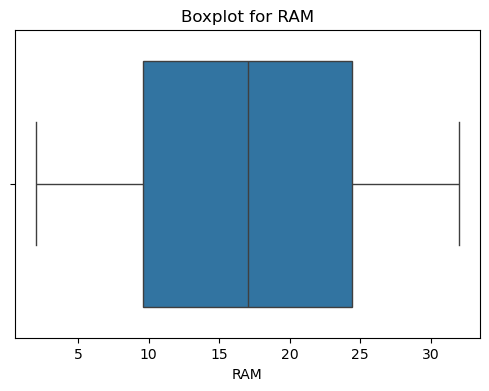

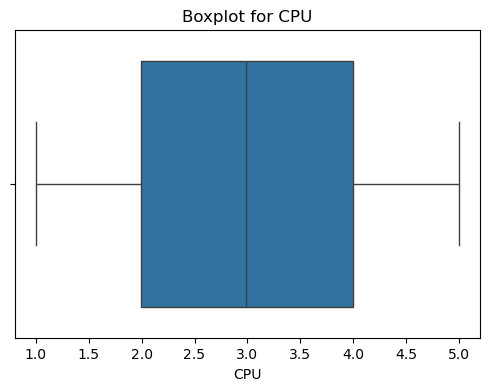

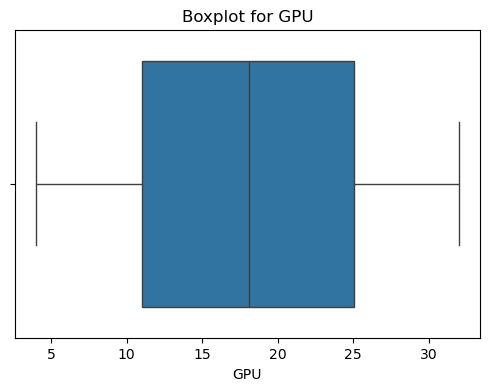

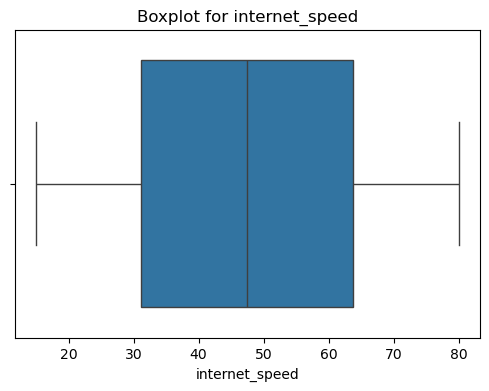

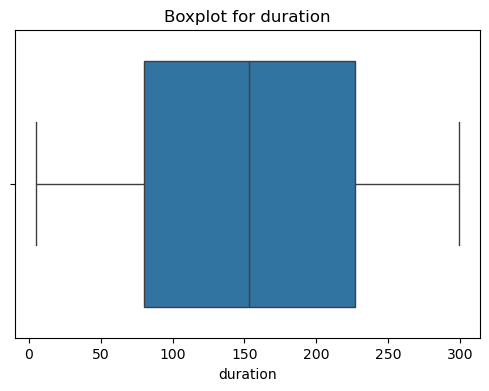

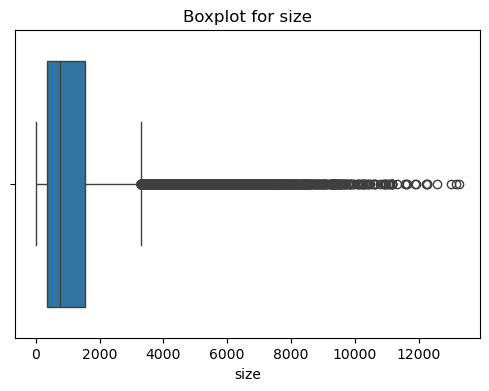

In [10]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [11]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

         RAM       CPU        GPU  internet_speed  duration         size
0  14.501488  1.456207  29.967226       51.397316       141   615.618633
1   5.309100  4.935745  14.256539       32.319107        88   577.960818
2  13.035482  4.175384   9.881854       25.492594       190  1054.916052
3   4.337086  2.427863   9.772614       74.378567        58    69.175967
4  30.464264  4.307870  25.779958       34.523890       262  3298.311193


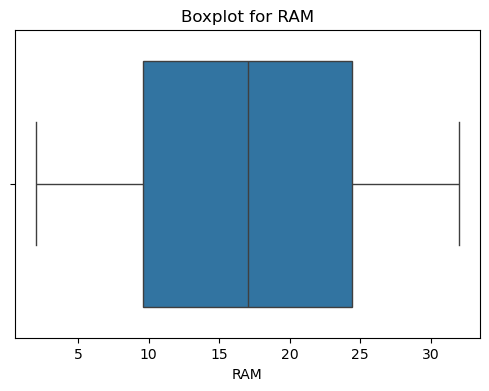

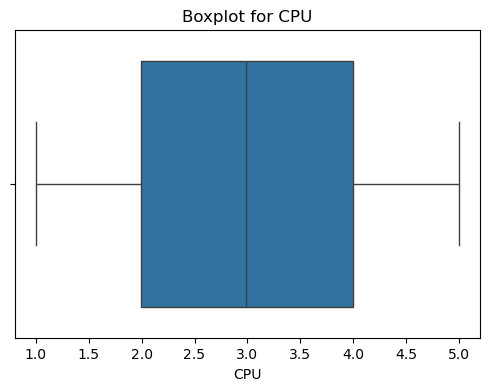

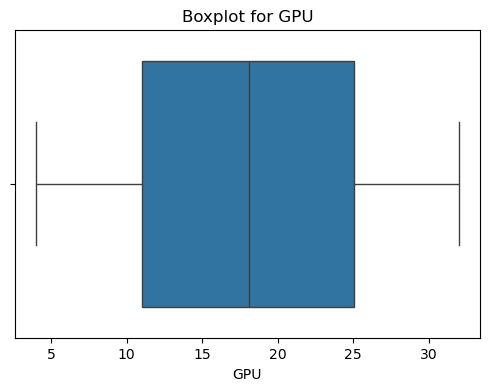

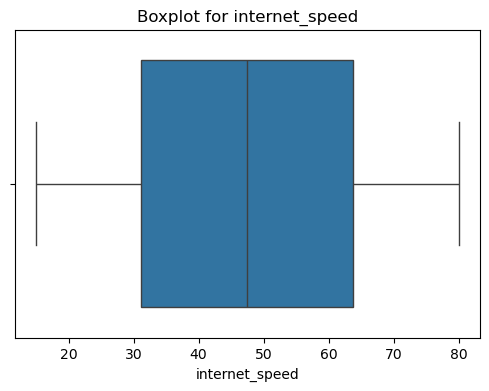

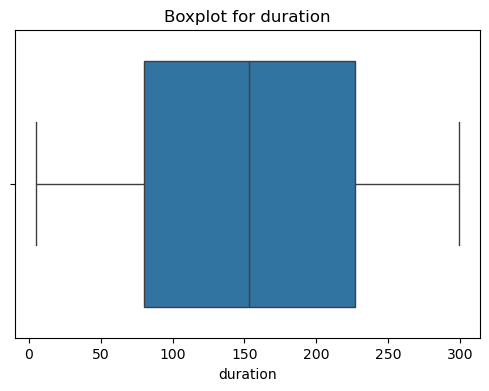

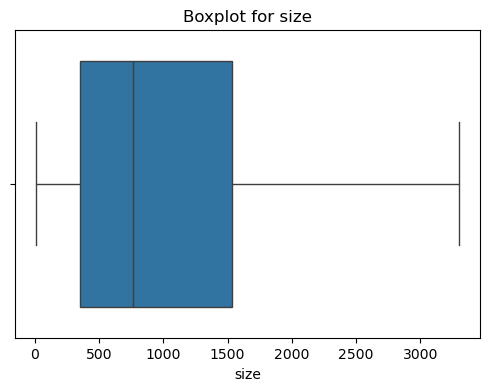

In [12]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting data

In [14]:
X = data.drop(columns=['size'])
y = data['size']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [16]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='linear')
}

for name, reg in regressors.items():
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print(f'{name} Mean Squared Error: {mse:.2f}')
    print(f'{name} R^2 Score: {r2:.2f}\n')

Linear Regression R^2 Score: 0.82

Random Forest Regressor R^2 Score: 0.99

Decision Tree Regressor R^2 Score: 0.80

KNN Regressor R^2 Score: 0.99

SVR R^2 Score: 0.81



In [17]:
#END